In [ ]:
############################## MADE BY SHIVAM TIWARI ##############################

In [25]:
#Install imageio package
!pip install imageio

In [26]:
%matplotlib inline
import imageio
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import IPython.display as dp

#Display the image from the web using an URI.
img = requests.get("https://w0.peakpx.com/wallpaper/42/267/HD-wallpaper-nature-scenery-scenery-nature.jpg").content
# image_data = response.content

In [ ]:
############################## MADE BY SHIVAM TIWARI ##############################

In [27]:
#Read the image using imgaeio package's imread method and URI from web using
# response = requests.get(img)
# image_data = response.content
source_img = imageio.imread(img)

<ipython-input-27-d20f60b2cb91>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread(img)


In [28]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

In [ ]:
############################## MADE BY SHIVAM TIWARI ##############################

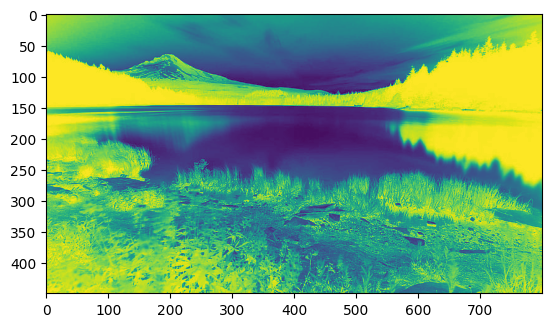

In [29]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

<ipython-input-30-1c3f4d28fc51>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


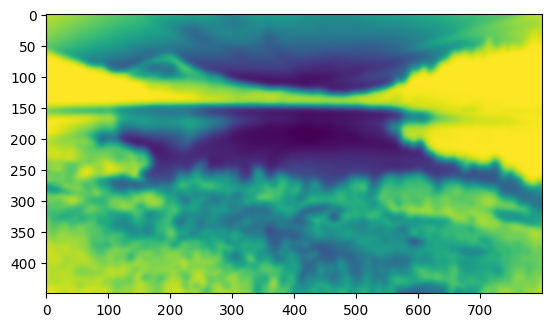

In [30]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [ ]:
############################## MADE BY SHIVAM TIWARI ##############################

In [31]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [32]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

<ipython-input-31-42747d86522c>:3: RuntimeWarning: divide by zero encountered in divide
  resultant_dodge=blur_img*255/(255-gryscl_img)


In [ ]:
############################## MADE BY SHIVAM TIWARI ##############################

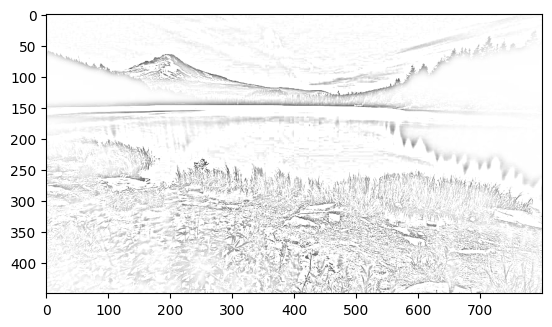

In [33]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [34]:
#Save the image
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)

In [ ]:
############################## MADE BY SHIVAM TIWARI ##############################